# IMDb Review Tutorial 
#### ***[코드출처: 오늘코드(박조은 님)](https://github.com/corazzon)***

![](https://static.amazon.jobs/teams/53/images/IMDb_Header_Page.jpg?1501027252)

# 튜토리얼 PART 2 Word2Vec
### - 딥러닝 기법인 Word2Vec을 통해 단어를 벡터화 해본다.
### - t-SNE를 통해 벡터화 한 데이터를 시각화 해본다.
### - 딥러닝과 지도학습의 랜덤포레스트를 사용하는 하이브리드 방식을 사용한다.

## Word2Vec (Word Embedding to Vector)
#### 컴퓨터는 숫자만 인식할 수 있고 한글, 이미지는 바이너리 코드로 저장된다. 튜토리얼 파트1에서는 Bag of Words 라는 개념을 사용해서 머신러닝 알고리즘이 이해할 수 있도록 문자를 벡터화 해주는 작업을 하였다.
- one hot encoding 혹은 Bag of words에서 vector size가 매우 크고 sparse하므로 neural net 성능이 잘 나오지 않는다.
- '주위 단어가 비슷하면 해당 단어의 의미는 유사하다'라는 아이디어
- 단어를 트레이닝 시킬 때 주위 단어를 label로 매치하여 최적화
- 단어를 의미를 내포한 dense vector로 매칭 시키는 것
- Word2Vec은 분산 된 텍스트 표현을 사용하여 개념 간 유사성을 본다. 예를 들어, 파리와 프랑스가 베를린과 독일과 같은 방식으로 관련되어 있음을 이해한다 (수도와 국가)

![](https://1.bp.blogspot.com/-Q7F8ulD6fC0/UgvnVCSGmXI/AAAAAAAAAbg/MCWLTYBufhs/s1600/image00.gif)

### 출처 : https://opensource.googleblog.com/2013/08/learning-meaning-behind-words.html

### Word2Vec은 크게 두가지로 나뉜다.

#### CBOW와 Skip-Gram 기법이 있다.
1. CBOW(continuous bag of words)는 텍스트로 하나의 단어를 예측하기 때문에 작은 데이터셋일수록 유리하다.
 - 아래 예제에서 ___ 에 들어갈 단어를 예측한다.
    
    1) ___ 가 맛있다.
    
    2) ___ 를 타는 것이 재미있다.
    
    3) 평소보다 두 ___ 로 먹어서 ___ 가 아프다.

2. Skip_Gram은 타겟 단어들로부터 원본 단어를 역으로 예측하는 것이다. CBOW와는 반대로 컨텍스트-타겟 쌍을 새로운 발견으로 처리하고 큰 규모의 데이터셋을 가질 때 유리하다.
 - '배'라는 단어 주변에 올 수 있는 단어를 예측한다.
    
    1) *배*가 맛있다.
    
    2) *배*를 타는 것이 재미있다.
    
    3) 평소보다 두 *배*로 먹어서 *배*가 아프다.

## Word2Vec 참고자료
- [word2vec 모델 · 텐서플로우 문서 한글 번역본](https://tensorflowkorea.gitbooks.io/tensorflow-kr/g3doc/tutorials/word2vec/)
- [Word2Vec으로 문장 분류하기 · ratsgo's blog](https://ratsgo.github.io/natural%20language%20processing/2017/03/08/word2vec/)
- [Efficient Estimation of Word Representations in\n","Vector Space](https://arxiv.org/pdf/1301.3781v3.pdf)
- [Distributed Representations of Words and Phrases and their Compositionality](http://papers.nips.cc/paper/5021-distributed-representations- -of-words-and-phrases-and-their-compositionality.pdf)
- [CS224n: Natural Language Processing with Deep Learning](http://web.stanford.edu/class/cs224n/syllabus.html)
- [Word2Vec Tutorial - The Skip-Gram Model · Chris McCormick](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)

## Gensim
- [gensim: models.word2vec – Deep learning with word2vec](https://radimrehurek.com/gensim/models/word2vec.html)
- [gensim: Tutorials](https://radimrehurek.com/gensim/tutorial.html)|
- [한국어와 NLTK, Gensim의 만남 - PyCon Korea 2015](https://www.lucypark.kr/docs/2015-pyconkr/)

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

df_train = pd.read_csv("../input/nlp-dataset/labeledTrainData.tsv", header = 0,
                      delimiter = "\t", quoting = 3)
df_test = pd.read_csv("../input/nlp-dataset/testData.tsv", header = 0,
                      delimiter = "\t", quoting = 3)
df_unlabeled = pd.read_csv("../input/nlp-dataset/unlabeledTrainData.tsv", header = 0,
                      delimiter = "\t", quoting = 3)

print(df_train.shape)
print(df_test.shape)
print(df_unlabeled.shape)

print(df_train["review"].size)
print(df_test["review"].size)
print(df_unlabeled["review"].size)

(25000, 3)
(25000, 2)
(50000, 2)
25000
25000
50000


In [3]:
df_train.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [4]:
df_test.head()

# 예측해야하는 sentiment 피쳐가 없다.

,id,review
0,"""12311_10""","""Naturally in a film who's main themes are of ..."
1,"""8348_2""","""This movie is a disaster within a disaster fi..."
2,"""5828_4""","""All in all, this is a movie for kids. We saw ..."
3,"""7186_2""","""Afraid of the Dark left me with the impressio..."
4,"""12128_7""","""A very accurate depiction of small time mob l..."


In [5]:
import re
import nltk

import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from multiprocessing import Pool

class KaggleWord2VecUtility(object):

    @staticmethod
    def review_to_wordlist(review, remove_stopwords=False):
        # 1. HTML 제거
        review_text = BeautifulSoup(review, "html.parser").get_text()
        # 2. 특수문자를 공백으로 바꿔줌
        review_text = re.sub('[^a-zA-Z]', ' ', review_text)
        # 3. 소문자로 변환 후 나눈다.
        words = review_text.lower().split()
        # 4. 불용어 제거
        if remove_stopwords:
            stops = set(stopwords.words('english'))
            words = [w for w in words if not w in stops]
        # 5. 어간추출
        stemmer = SnowballStemmer('english')
        words = [stemmer.stem(w) for w in words]
        # 6. 리스트 형태로 반환
        return(words)

    @staticmethod
    def review_to_join_words( review, remove_stopwords=False ):
        words = KaggleWord2VecUtility.review_to_wordlist(\
            review, remove_stopwords=False)
        join_words = ' '.join(words)
        return join_words

    @staticmethod
    def review_to_sentences( review, remove_stopwords=False ):
        # punkt tokenizer를 로드한다.
        """
        이 때, pickle을 사용하는데
        pickle을 통해 값을 저장하면 원래 변수에 연결 된 참조값 역시 저장된다.
        저장된 pickle을 다시 읽으면 변수에 연결되었던
        모든 레퍼런스가 계속 참조 상태를 유지한다.
        """
        tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
        # 1. nltk tokenizer를 사용해서 단어로 토큰화 하고 공백 등을 제거한다.
        raw_sentences = tokenizer.tokenize(review.strip())
        # 2. 각 문장을 순회한다.
        sentences = []
        for raw_sentence in raw_sentences:
            # 비어있다면 skip
            if len(raw_sentence) > 0:
                # 태그제거, 알파벳문자가 아닌 것은 공백으로 치환, 불용어제거
                sentences.append(\
                    KaggleWord2VecUtility.review_to_wordlist(\
                    raw_sentence, remove_stopwords))
        return sentences


    # 참고 : https://gist.github.com/yong27/7869662
    # http://www.racketracer.com/2016/07/06/pandas-in-parallel/
    # 속도 개선을 위해 멀티 스레드로 작업하도록
    @staticmethod
    def _apply_df(args):
        df, func, kwargs = args
        return df.apply(func, **kwargs)

    @staticmethod
    def apply_by_multiprocessing(df, func, **kwargs):
        # 키워드 항목 중 workers 파라메터를 꺼냄
        workers = kwargs.pop('workers')
        # 위에서 가져온 workers 수로 프로세스 풀을 정의
        pool = Pool(processes=workers)
        # 실행할 함수와 데이터프레임을 워커의 수 만큼 나눠 작업
        result = pool.map(KaggleWord2VecUtility._apply_df, [(d, func, kwargs)
                for d in np.array_split(df, workers)])
        pool.close()
        # 작업 결과를 합쳐서 반환
        return pd.concat(result)
    
    
# KaggleWord2VecUtility를 class로 생성하여 사용 
# 코드 출처: https://github.com/corazzon/KaggleStruggle/blob/master/word2vec-nlp-tutorial/KaggleWord2VecUtility.py

In [6]:
KaggleWord2VecUtility.review_to_wordlist(df_train["review"][0])[:10]

['with', 'all', 'this', 'stuff', 'go', 'down', 'at', 'the', 'moment', 'with']

In [7]:
sentences = []
for review in df_train["review"]:
    sentences += KaggleWord2VecUtility.review_to_sentences(
    review, remove_stopwords = False)
    
# KaggleWord2VecUtility을 사용하여 train 데이터를 정제해준다.

In [8]:
for review in df_unlabeled["review"]:
    sentences += KaggleWord2VecUtility.review_to_sentences(
    review, remove_stopwords = False)
    
# KaggleWord2VecUtility을 사용하여 unlabeled train 데이터를 정제해준다.    

In [9]:
len(sentences)

795538

In [10]:
sentences[0][:10]

['with', 'all', 'this', 'stuff', 'go', 'down', 'at', 'the', 'moment', 'with']

# Word2Vec 모델을 학습

### 전처리를 거쳐 파싱된 문장의 목록으로 모델을 학습시킬 준비가 되었다.

# Gensim

* [gensim: models.word2vec - Deep learning with word2vec](https://radimrehurek.com/gensim/models/word2vec.html)

## Word2Vec 모델의 파라메터

* 아키텍처: 아키텍처 옵션은 skip-gram(default) 또는 CBOW 모델이다. skip-gram은 느리지만 더 나은 결과를 낸다.
* 학습 알고리즘: Hierarchical softmax(default) 또는 negative 샘플링. 여기에서는 기본값이 잘 동작한다.
* 빈번하게 등장하는 단어에 대한 다운 샘플링: Google 문서는 0.00001에서 0.001 사이의 값을 권장한다. 여기에서는 0.001에 가까운 값이 최종 모델의 정확도를 높이는 것으로 보여진다.
* 단어 벡터 차원: 많은 feature를 사용한다고 항상 좋은 것은 아니지만 대체적으로 좀 더 나은 모델이 된다. 합리적인 값은 수십에서 수백 개가 될 수 있고 여기에서는 300으로 지정했다.
* 컨텍스트 / 창크기: 학습 알고리즘이 고려해야 하는 컨텍스트의 단어수는 얼마나 될까? Hierarchical softmax를 위해 좀 더 큰 수가 좋지만 10정도가 적당하다.
* Worker threads: 실행할 병렬 프로세스의 수로 컴퓨터마다 다르지만 대부분의 시스템에서 4~6의 값을 사용한다.
* 최소 단어 수: 어휘의 크기를 의미있는 단어로 제한하는 데 도움이 된다. 모든 문서에서 여러 번 발생하지 않는 단어는 무시된다. 10에서 100사이가 적당하며, 이 대회의 데이터는 각 영화가 30개씩의 리뷰가 있기 때문에 개별 영화 제목에 너무 많은 중요성이 붙는 것을 피하기 위해 최소 단어 수를 40으로 설정한다. 그 결과 전체 어휘 크기는 약 15,000 단어가 된다. 높은 값은 제한 된 실행시간에 도움이 된다.


In [11]:
import logging
logging.basicConfig(
    format = "%(asctime)s : %(levelname)s : %(message)s",
    level = logging.INFO)

In [12]:
# 파라미터 값을 지정해준다. 

num_features = 300 # 문자 벡터 차원 수 (size)
min_word_count = 40 # 최소 문자 수 (min_count)
num_workers = 4 # 병렬 처리 스레드 수 (workers)
context = 10 # 문자열 창 크기 (window)
downsampling = 1e-3 # 문자 빈도 수 Downsample (sample)

# 초기화 및 모델 학습
from gensim.models import word2vec

model = word2vec.Word2Vec(sentences,
                         workers = num_workers,
                         size = num_features,
                         min_count = min_word_count,
                         window = context,
                         sample = downsampling)

model

In [13]:
# 학습이 완료되면 필요없는 메모리를 unload 시킨다.
model.init_sims(replace = True)

model_name = "300features_40minwindows_10text"
model.save(model_name)

# 모델 결과 탐색

In [14]:
# 유사도가 없는 단어 추출
model.wv.doesnt_match("man woman child kitchen".split())

'kitchen'

In [15]:
model.wv.doesnt_match("france england germany berlin".split())

'berlin'

In [16]:
# 가장 유사한 단어를 추출
model.wv.most_similar("man")

[('woman', 0.6301915645599365),
 ('lad', 0.5157097578048706),
 ('ladi', 0.5136803984642029),
 ('millionair', 0.5116305351257324),
 ('farmer', 0.4832538962364197),
 ('loner', 0.48145240545272827),
 ('businessman', 0.4806089997291565),
 ('boxer', 0.47325581312179565),
 ('men', 0.4622720777988434),
 ('widow', 0.45896074175834656)]

In [17]:
model.wv.most_similar("queen")

[('princess', 0.597754716873169),
 ('regina', 0.569765567779541),
 ('victoria', 0.5576621294021606),
 ('bride', 0.5568215847015381),
 ('maid', 0.5533725023269653),
 ('latifah', 0.5511553883552551),
 ('goddess', 0.5497056841850281),
 ('madam', 0.541550874710083),
 ('countess', 0.5383766889572144),
 ('duchess', 0.5342220067977905)]

In [18]:
model.wv.most_similar("film")

[('movi', 0.8504784107208252),
 ('flick', 0.63067626953125),
 ('documentari', 0.5650286674499512),
 ('pictur', 0.5570810437202454),
 ('cinema', 0.5343281030654907),
 ('masterpiec', 0.4910289943218231),
 ('genr', 0.4852064847946167),
 ('it', 0.4846654534339905),
 ('thriller', 0.48318350315093994),
 ('sequel', 0.4797492027282715)]

In [19]:
model.wv.most_similar("happi")

[('unhappi', 0.4615175724029541),
 ('bitter', 0.4182191491127014),
 ('sad', 0.4124365746974945),
 ('satisfi', 0.39198851585388184),
 ('afraid', 0.3872877359390259),
 ('happier', 0.38578730821609497),
 ('sappi', 0.37480512261390686),
 ('glad', 0.37127596139907837),
 ('joy', 0.36875396966934204),
 ('lucki', 0.36484166979789734)]

# Word2Vec으로 벡터화 한 단어를 t-SNE을 통해 시각화

In [20]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams["axes.unicode_minus"] = False

model_name = "300features_40minwindows_10text"
model = g.Doc2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components = 2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100,:])

11986
[ 0.02309473  0.05539943  0.07204851  0.07243472 -0.07947007  0.10345697
 -0.01522155  0.02508094  0.00871072 -0.02064168]


In [21]:
df = pd.DataFrame(X_tsne, index = vocab[:100], columns = ["x", "y"])
df.shape

(100, 2)

In [22]:
df.head()

,x,y
with,-0.168613,6.955094
all,-3.843665,-1.542129
this,-4.085802,0.180400
stuff,-0.286852,-0.241574
go,-3.993895,6.514215


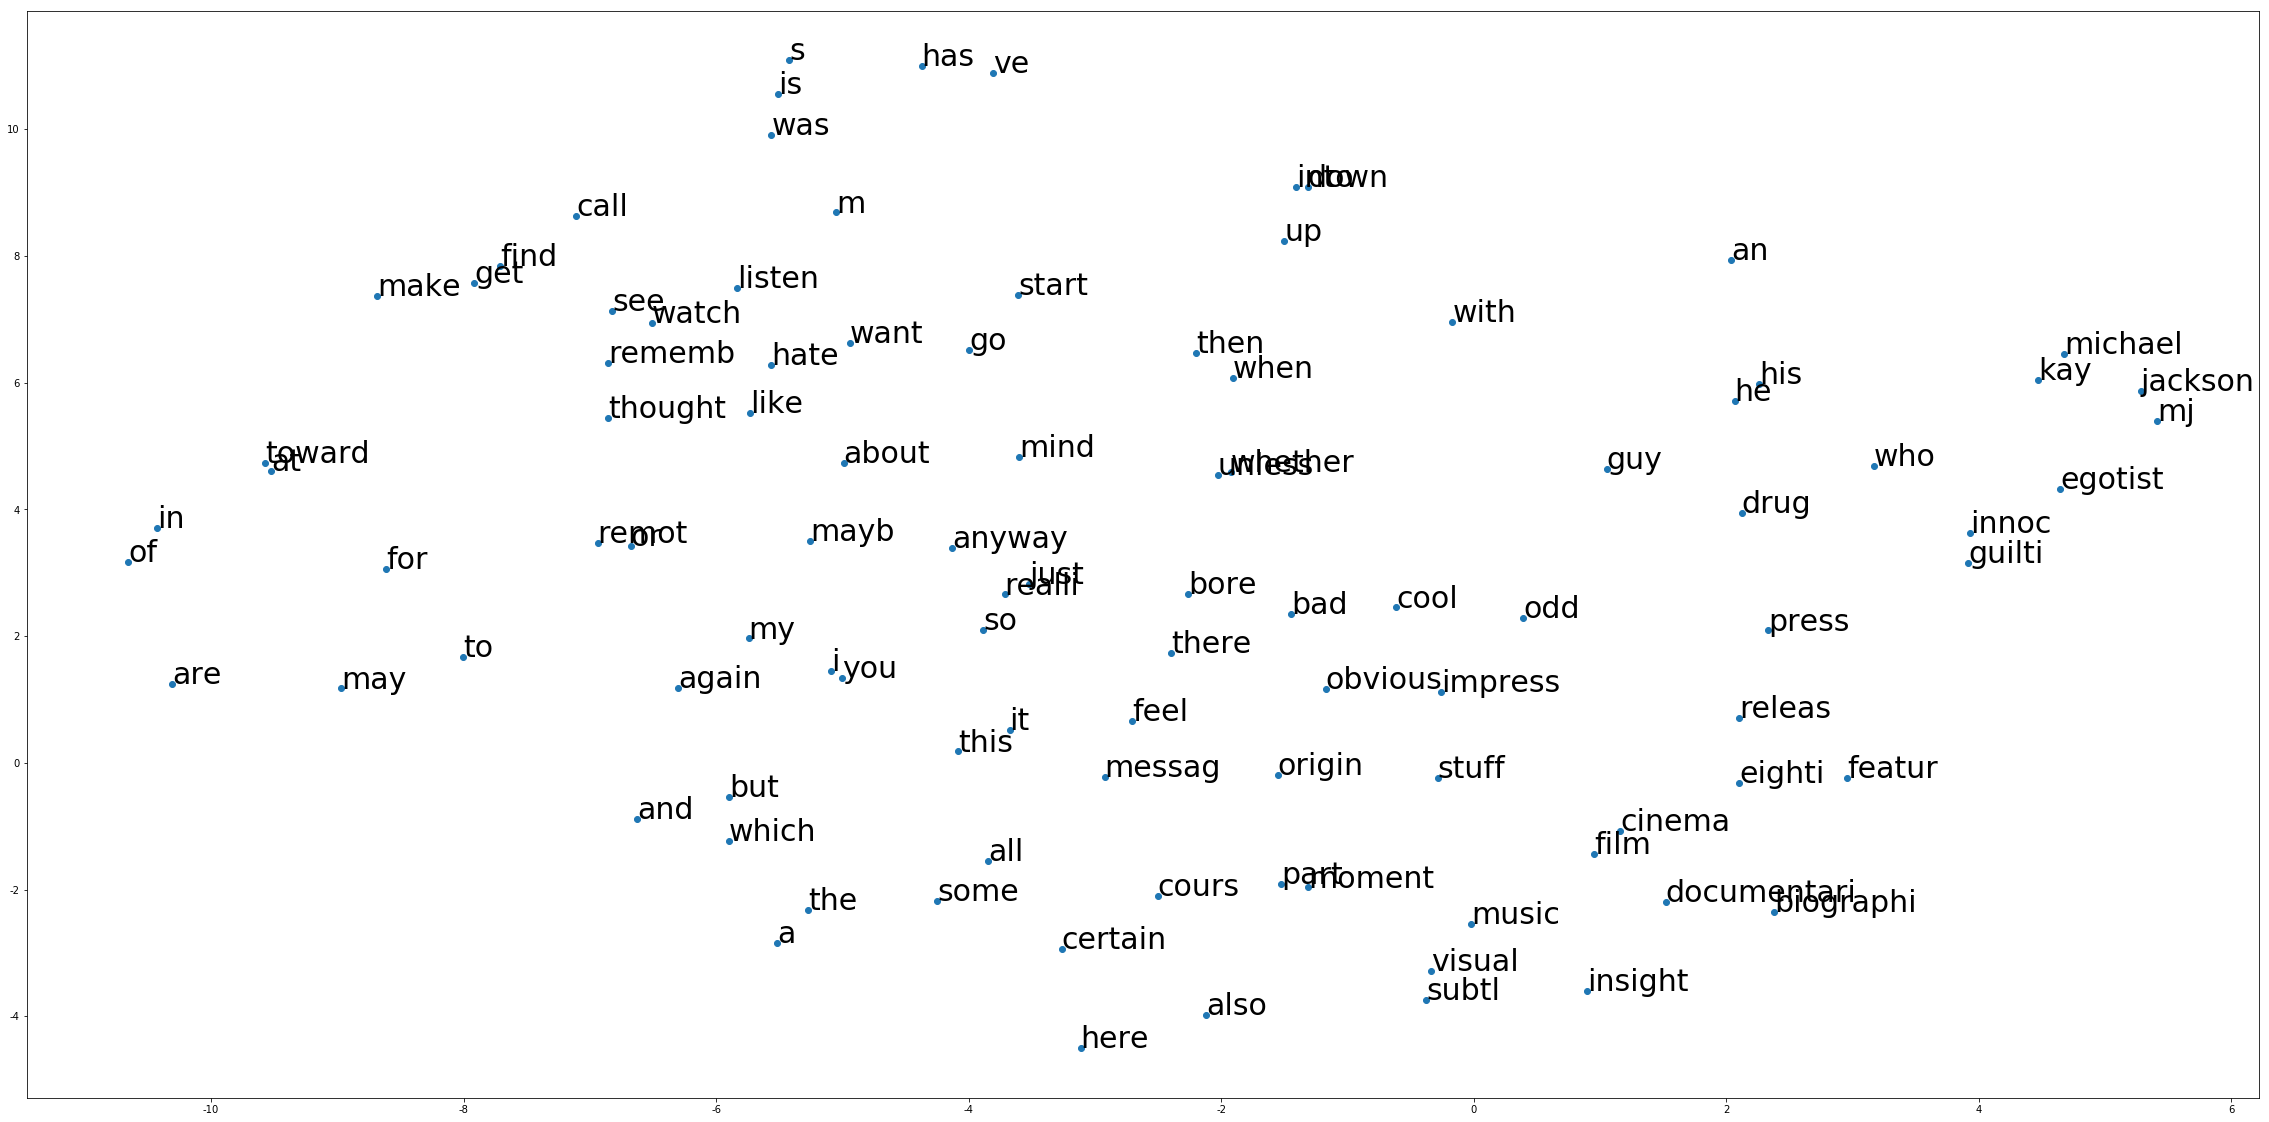

In [23]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df["x"], df["y"])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize = 30)

plt.show()

## 평균 feature 벡터 계산, 2D numpy 배열로 반환

In [24]:
import numpy as np


# def를 이용해서 주어진 문장에서 단어 벡터의 평균을 구하는 함수를 만든다.
def makeFeatureVec(words, model, num_features):
    featureVec = np.zeros((num_features,),dtype = "float32")
    
    # 속도를 위해 0으로 채운 배열로 초기화 한다.
    nwords = 0.
    # Index2word는 모델의 사전에 있는 단어명을 담은 리스트이다.
    # 속도를 위해 set 형태로 초기화 한다.
    index2word_set = set(model.wv.index2word)
    # 루프를 돌며 모델 사전에 포함이 되는 단어라면 피처에 추가한다.
    for word in words:
        if word in index2word_set:
            nwords = nwords + 1.
            featureVec = np.add(featureVec, model[word])
    # 결과를 단어수로 나누어 평균을 구한다.        
    featureVec = np.divide(featureVec, nwords)
    return featureVec

In [25]:
def getAvgFeatureVecs(reviews, model, num_features):
    # 리뷰 단어 목록의 각각에 대한 평균 feature 벡터를 계산하고
    # 2d Numpy Array로 반환한다.
    
    # 카운터를 초기화 한다.
    counter = 0.
    # 속도를 위해 2D 넘파이 배열을 미리 할당한다.
    reviewFeatureVecs = np.zeros(
        (len(reviews), num_features), dtype = "float32")
    
    for review in reviews:
        # 매 1000개 리뷰마다 상태를 출력
        if counter%1000. == 0.:
            print("Review %d of %d"%(counter, len(reviews)))
        # 평균 피처 벡터를 만들기 위해 위에서 정의한 함수를 호출한다.    
        reviewFeatureVecs[int(counter)] = makeFeatureVec(review,
                                                         model,
                                                        num_features)
        # 카운터를 증가시킨다.
        counter = counter + 1.
    return reviewFeatureVecs

In [26]:
# 멀티스레드로 4개의 워커를 사용해 처리한다.

def getCleanReviews(reviews):
    clean_reviews = []
    clean_reviews = KaggleWord2VecUtility.apply_by_multiprocessing(\
        reviews["review"], KaggleWord2VecUtility.review_to_wordlist,\
        workers = 4)
    return clean_reviews

In [27]:
%time trainDataVecs = getAvgFeatureVecs(\
    getCleanReviews(df_train), model, num_features)

Review 0 of 25000
Review 1000 of 25000
Review 2000 of 25000
Review 3000 of 25000
Review 4000 of 25000
Review 5000 of 25000
Review 6000 of 25000
Review 7000 of 25000
Review 8000 of 25000
Review 9000 of 25000
Review 10000 of 25000
Review 11000 of 25000
Review 12000 of 25000
Review 13000 of 25000
Review 14000 of 25000
Review 15000 of 25000
Review 16000 of 25000
Review 17000 of 25000
Review 18000 of 25000
Review 19000 of 25000
Review 20000 of 25000
Review 21000 of 25000
Review 22000 of 25000
Review 23000 of 25000
Review 24000 of 25000
CPU times: user 1min 37s, sys: 832 ms, total: 1min 38s
Wall time: 2min 34s


In [28]:
%time testDataVecs = getAvgFeatureVecs(\
    getCleanReviews(df_test), model, num_features)

Review 0 of 25000
Review 1000 of 25000
Review 2000 of 25000
Review 3000 of 25000
Review 4000 of 25000
Review 5000 of 25000
Review 6000 of 25000
Review 7000 of 25000
Review 8000 of 25000
Review 9000 of 25000
Review 10000 of 25000
Review 11000 of 25000
Review 12000 of 25000
Review 13000 of 25000
Review 14000 of 25000
Review 15000 of 25000
Review 16000 of 25000
Review 17000 of 25000
Review 18000 of 25000
Review 19000 of 25000
Review 20000 of 25000
Review 21000 of 25000
Review 22000 of 25000
Review 23000 of 25000
Review 24000 of 25000
CPU times: user 1min 36s, sys: 676 ms, total: 1min 36s
Wall time: 2min 31s


In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators = 100, n_jobs = -1, random_state = 42)

In [30]:
%time rf.fit(trainDataVecs, df_train["sentiment"])

CPU times: user 1min 18s, sys: 83 ms, total: 1min 18s
Wall time: 20.1 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [31]:
from sklearn.model_selection import cross_val_score
%time score= np.mean(cross_val_score(\
    rf, trainDataVecs, df_train["sentiment"], cv = 10, scoring = "roc_auc"))

CPU times: user 7.14 s, sys: 985 ms, total: 8.13 s
Wall time: 3min 4s


In [32]:
score

0.902313792

In [33]:
result = rf.predict(testDataVecs)

In [34]:
output = pd.DataFrame(data = {"id": df_test["id"], "sentiment": result})
output.to_csv("./Word2Vec_Tutorial_{:.5f}.csv".format(score),
             index = False, quoting = 3)

In [35]:
output_sentiment = output["sentiment"].value_counts()
print(output_sentiment[0] - output_sentiment[1])
output_sentiment

132


0    12566
1    12434
Name: sentiment, dtype: int64